In [168]:
# Importing relevant libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, ttest_ind

In [169]:
df = pd.read_csv('SBAnational_clean.csv') # Reading in dataset

In [ ]:
df.columns

Checking characteristics of the name variable to determine what dataset actually represents

In [170]:
df['Name'].value_counts()

Name
654369    1269
566326     433
149296     366
566151     345
206174     329
          ... 
363453       1
376027       1
300302       1
401737       1
521251       1
Name: count, Length: 779583, dtype: int64

In [171]:
df.groupby('Name')[['Term', 'NoEmp', 'ApprovalFY', 'GrAppv']].nunique().sort_values('Term', ascending=False).head(10)


,Term,NoEmp,ApprovalFY,GrAppv
Name,,,,
654369,106,61,22,409
149296,85,41,14,215
566326,81,30,10,116
566151,77,28,15,118
615104,72,42,16,147
184746,71,51,26,210
206174,68,72,21,190
446112,63,4,19,180
700252,59,15,10,152


In [172]:
df[df['Name'] == 654369].sort_values('Term').head(10)


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,DaysToDisbursement,Industry,Minority
590477,5830604000,654369,2899,34,14220,3479,37,722211,11/01/2002,2003,...,5/31/2003,120000,0,0,65701,120000,102000,211,72,1
532665,5195604000,654369,5205,4,94520,469,30,722211,02/05/2002,2002,...,2/28/2002,47099,0,0,19292,50000,25000,23,72,1
665560,6747514001,654369,28606,3,85282,5653,45,722211,9/30/2003,2003,...,1/31/2004,122335,0,0,36186,100000,50000,123,72,1
523262,5070673010,654369,8444,38,16503,4216,41,0,9/25/1992,1992,...,1/31/1993,20000,0,0,11490,20000,18000,128,0,1
563736,5550004003,654369,11004,18,70053,2178,21,722211,7/23/2002,2002,...,10/31/2002,175000,0,0,129798,175000,131250,100,72,1
649430,6509894004,654369,25659,9,32958,5001,9,722211,7/21/2003,2003,...,9/30/2003,123000,0,0,69224,123000,104550,71,72,1
519415,5024314002,654369,21253,36,74055,699,39,722211,11/02/2001,2002,...,12/31/2001,221200,0,0,95775,221200,165900,59,72,1
582715,5754044006,654369,15204,38,17540,4975,41,722211,10/02/2002,2003,...,10/31/2002,9700,0,0,9653,10000,5000,29,72,1
547524,5371354008,654369,584,12,50021,5653,26,722211,05/01/2002,2002,...,9/30/2002,77000,0,1,0,77000,38500,152,72,0
706520,7348084000,654369,23924,40,29936,981,49,722211,04/12/2004,2004,...,5/31/2004,50000,0,0,3507,50000,25000,49,72,1


Predictor Variable

In [173]:
df['Default'] = df['MIS_Status'].apply(lambda x: 1 if x == 0 else 0) # Creating the binary target variable

Checking if BalanceGross could be useful for the filtering process

In [174]:
len(df[(df['Default'] == 1) & (df['BalanceGross'] == 0)])

157954

In [175]:
len(df[(df['Default'] == 0) & (df['BalanceGross'] == 0)])

741196

In [176]:
df['BalanceGross'].value_counts()

BalanceGross
0         899150
12750          1
827875         1
25000          1
37100          1
43127          1
84617          1
1760           1
115820         1
996262         1
395476         1
41509          1
600            1
9111           1
96908          1
Name: count, dtype: int64

Filtering dataset for loans that have reached their full time period (or have defaulted)

In [177]:
# Convert ApprovalDate to datetime
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')

In [178]:
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalYear'].value_counts()

ApprovalYear
2006    77247
2005    75115
2004    71281
2007    67016
2003    62247
2002    47496
1995    41847
1996    40848
2001    38370
1997    37744
1999    37693
1994    37030
2000    36796
1998    35783
2008    30786
1993    25032
1992    21122
2009    19696
2010    16774
1991    16484
1990    15002
1989    13574
2011     9670
2012     5053
1988     4333
1986     2198
1987     2139
1984     1993
1985     1981
1983     1848
2013     1732
1982      852
1981      598
1980      576
1979      361
1978      270
1977      141
2014      128
1976       88
1975       49
1973       46
2072       46
1974       32
2070       19
2071       15
2069        4
2068        3
2067        3
2066        1
2061        1
2064        1
Name: count, dtype: int64

In [179]:
df[df['ApprovalYear'] > 2025][['ApprovalDate', 'ApprovalFY', 'ApprovalYear', 'Default']]

,ApprovalDate,ApprovalFY,ApprovalYear,Default
649,2071-08-13,1972,2071,1
2005,2072-02-25,1972,2072,0
7454,2071-11-16,1972,2071,0
7509,2071-11-30,1972,2071,1
20250,2071-08-06,1972,2071,0
...,...,...,...,...
804226,2071-01-11,1971,2071,1
805754,2071-05-28,1971,2071,1
820902,2071-03-17,1971,2071,1
820949,2071-04-26,1971,2071,1


In [180]:
df[df['ApprovalYear'] != df['ApprovalFY']][['ApprovalDate', 'ApprovalFY', 'ApprovalYear']]


,ApprovalDate,ApprovalFY,ApprovalYear
44,1996-10-04,1997,1996
222,1997-10-09,1998,1997
223,1997-10-10,1998,1997
226,1997-10-10,1998,1997
227,1997-10-14,1998,1997
...,...,...,...
893534,1996-12-31,1997,1996
893535,1996-12-31,1997,1996
893537,1996-12-31,1997,1996
898351,1981-10-19,1982,1981


In [181]:
# Fix ApprovalDate if its year is wrongly in the future (> 2025)
df['ApprovalDate'] = df['ApprovalDate'].apply(
    lambda d: d.replace(year=d.year - 100) if d.year > 2025 else d
)


df['ApprovalDate'].dt.year.value_counts()

ApprovalDate
2006    77247
2005    75115
2004    71281
2007    67016
2003    62247
2002    47496
1995    41847
1996    40848
2001    38370
1997    37744
1999    37693
1994    37030
2000    36796
1998    35783
2008    30786
1993    25032
1992    21122
2009    19696
2010    16774
1991    16484
1990    15002
1989    13574
2011     9670
2012     5053
1988     4333
1986     2198
1987     2139
1984     1993
1985     1981
1983     1848
2013     1732
1982      852
1981      598
1980      576
1979      361
1978      270
1977      141
2014      128
1976       88
1975       49
1973       46
1972       46
1974       32
1970       19
1971       15
1969        4
1968        3
1967        3
1966        1
1961        1
1964        1
Name: count, dtype: int64

In [182]:
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalYear'].value_counts()

ApprovalYear
2006    77247
2005    75115
2004    71281
2007    67016
2003    62247
2002    47496
1995    41847
1996    40848
2001    38370
1997    37744
1999    37693
1994    37030
2000    36796
1998    35783
2008    30786
1993    25032
1992    21122
2009    19696
2010    16774
1991    16484
1990    15002
1989    13574
2011     9670
2012     5053
1988     4333
1986     2198
1987     2139
1984     1993
1985     1981
1983     1848
2013     1732
1982      852
1981      598
1980      576
1979      361
1978      270
1977      141
2014      128
1976       88
1975       49
1973       46
1972       46
1974       32
1970       19
1971       15
1969        4
1968        3
1967        3
1966        1
1961        1
1964        1
Name: count, dtype: int64

In [183]:
df['ApprovalDate'].max()

Timestamp('2014-06-25 00:00:00')

In [ ]:
from dateutil.relativedelta import relativedelta

# Creating a LoanEndDate column
df['LoanEndDate'] = df.apply(lambda row: row['ApprovalDate'] + relativedelta(months=row['Term']), axis=1)

In [ ]:
# Now filtering based on what previously said
df = df[(df['LoanEndDate'].dt.year <= 2014) | (df['Default'] == 1)].copy()

Analysis of Term to Inspect having value of 0 (originally done further down in code, but redid it as the removal of the 1,000 observations will affect the other variables)

In [186]:
len(df[df['Term'] < 60])

175490

In [187]:
# Calculating the default rate for loans with Term < 60 months
default_rate_short_term = df[df['Term'] < 60]['Default'].mean()
print(f"Default rate for loans with term < 5 years: {default_rate_short_term:.2%}")

Default rate for loans with term < 5 years: 56.77%


In [188]:
default_rate_long_term = df[df['Term'] >= 60]['Default'].mean()
print(f"Default rate for loans with term ≥ 5 years: {default_rate_long_term:.2%}")

Default rate for loans with term ≥ 5 years: 10.87%


In [189]:
len(df[df['Term'] >= 60])

536517

In [190]:
len(df[df['Term'] == 12])

17088

In [191]:
df[df['Term'] == 0].shape

(810, 33)

In [192]:
df[df['Term'] == 0][['GrAppv', 'SBA_Appv', 'Default']]  # see if there's any pattern

,GrAppv,SBA_Appv,Default
635,29000,14500,1
673,30000,15000,1
776,50000,25000,1
916,150000,75000,1
1084,150000,75000,1
...,...,...,...
891986,16000,8000,1
894913,93000,74400,1
895325,1100000,748000,1
896757,40000,32000,1


In [193]:
df['Term'].describe(percentiles=[.99, .999])  # see if 569 is an extreme outlier

count    712007.000000
mean         84.029661
std          52.121862
min           0.000000
50%          84.000000
99%         241.000000
99.9%       300.000000
max         461.000000
Name: Term, dtype: float64

In [194]:
df[df['Term'] == 0]['Default'].value_counts()

Default
1    735
0     75
Name: count, dtype: int64

In [195]:
# Now filter
df = df[(df['Term'] > 0)]

In [196]:
len(df)

711197

In [197]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'DaysToDisbursement', 'Industry', 'Minority', 'Default', 'ApprovalYear',
       'LoanEndDate'],
      dtype='object')

In [198]:
df = df.drop(columns = ['LoanEndDate'])

Initial Dropping of Columns

In [199]:
df.set_index('LoanNr_ChkDgt', inplace=True)
df = df.drop(columns = ['Name', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'DaysToDisbursement', 'Minority', 'NAICS', 'Bank'])

Analysis of UrbanRural column to inspect "Undefined"

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711197 entries, 1000014003 to 9996003010
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   City           711197 non-null  int64         
 1   State          711197 non-null  int64         
 2   Zip            711197 non-null  int64         
 3   BankState      711197 non-null  int64         
 4   ApprovalDate   711197 non-null  datetime64[ns]
 5   ApprovalFY     711197 non-null  int64         
 6   Term           711197 non-null  int64         
 7   NoEmp          711197 non-null  int64         
 8   NewExist       711197 non-null  int64         
 9   CreateJob      711197 non-null  int64         
 10  RetainedJob    711197 non-null  int64         
 11  FranchiseCode  711197 non-null  int64         
 12  UrbanRural     711197 non-null  int64         
 13  RevLineCr      711197 non-null  int64         
 14  LowDoc         711197 non-null  int64       

In [201]:
df['UrbanRural'].value_counts(normalize=True)

UrbanRural
1    0.514991
0    0.377392
2    0.107617
Name: proportion, dtype: float64

In [202]:
len(df)

711197

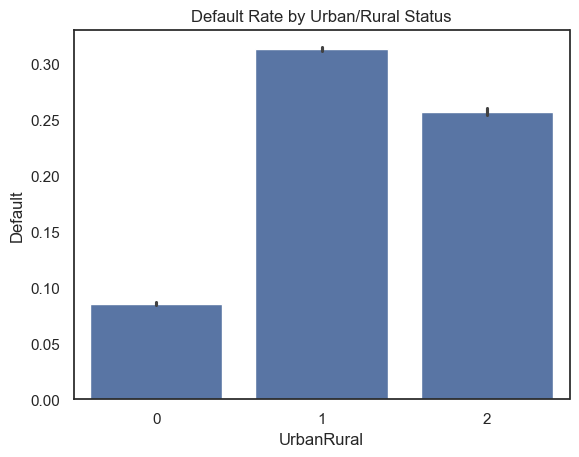

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check default rate by UrbanRural category
sns.barplot(x='UrbanRural', y='Default', data=df)
plt.title("Default Rate by Urban/Rural Status")
plt.show()

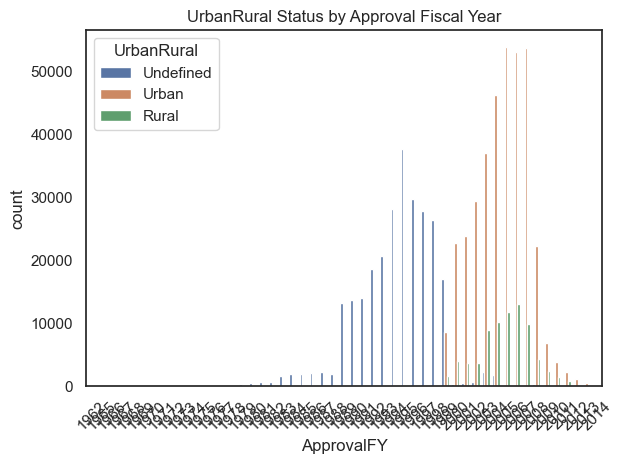

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column that marks Undefined
df['UrbanRural_Status'] = df['UrbanRural'].map({
    0: 'Undefined', 
    1: 'Urban', 
    2: 'Rural'
})

# Plot the count of undefined entries over approval fiscal years
sns.countplot(data=df, x='ApprovalFY', hue='UrbanRural_Status')
plt.title('UrbanRural Status by Approval Fiscal Year')
plt.xticks(rotation=45)
plt.legend(title='UrbanRural')
plt.tight_layout()
plt.show()


In [205]:
# Filter only Undefined rows
undefined_rows = df[df['UrbanRural'] == 0]

# Group by ApprovalFY and count
undefined_by_year = undefined_rows['ApprovalFY'].value_counts().sort_index()

# Optional: as DataFrame for nicer formatting
undefined_by_year_df = undefined_by_year.reset_index()
undefined_by_year_df.columns = ['ApprovalFY', 'Undefined_Count']
undefined_by_year_df


,ApprovalFY,Undefined_Count
0,1962,1
1,1965,1
2,1966,1
3,1967,2
4,1968,2
5,1969,4
6,1970,8
7,1971,20
8,1972,27
9,1973,52


In [206]:
# Total row count per year
total_by_year = df['ApprovalFY'].value_counts().sort_index()

# Undefined row count per year (already filtered)
undefined_by_year = df[df['UrbanRural'] == 0]['ApprovalFY'].value_counts().sort_index()

# Combine and calculate percentage
percentage_df = pd.DataFrame({
    'Total': total_by_year,
    'Undefined': undefined_by_year
}).fillna(0)

percentage_df['Percent_Undefined'] = (percentage_df['Undefined'] / percentage_df['Total'] * 100).round(2)
percentage_df.reset_index(inplace=True)
percentage_df.rename(columns={'index': 'ApprovalFY'}, inplace=True)

percentage_df.sort_values('ApprovalFY')


,ApprovalFY,Total,Undefined,Percent_Undefined
0,1962,1,1.0,100.00
1,1965,1,1.0,100.00
2,1966,1,1.0,100.00
3,1967,2,2.0,100.00
4,1968,2,2.0,100.00
5,1969,4,4.0,100.00
6,1970,8,8.0,100.00
7,1971,20,20.0,100.00
8,1972,27,27.0,100.00
9,1973,52,52.0,100.00


In [ ]:
# Counting the number of observations per category
df['UrbanRural_Status'] = df['UrbanRural'].map({
    0: 'Undefined',
    1: 'Urban',
    2: 'Rural'
})

urbanrural_counts = df['UrbanRural_Status'].value_counts(dropna=False)
urbanrural_counts_percent = df['UrbanRural_Status'].value_counts(normalize=True, dropna=False) * 100

# Displaying counts and percentages side by side
pd.DataFrame({
    'Count': urbanrural_counts,
    'Percentage': urbanrural_counts_percent.round(2)
})

,Count,Percentage
UrbanRural_Status,,
Urban,366260,51.50
Undefined,268400,37.74
Rural,76537,10.76


In [208]:
df = df.drop(columns = ['UrbanRural_Status'])

In [209]:
df.columns

Index(['City', 'State', 'Zip', 'BankState', 'ApprovalDate', 'ApprovalFY',
       'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RetainedJob',
       'FranchiseCode', 'UrbanRural', 'RevLineCr', 'LowDoc', 'MIS_Status',
       'GrAppv', 'SBA_Appv', 'Industry', 'Default', 'ApprovalYear'],
      dtype='object')

Checking proportion of dataset that defaulted

In [210]:
len(df)

711197

/var/folders/sy/bxcftcdx75n3w7kv3ljkq2p40000gn/T/ipykernel_47289/650136842.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


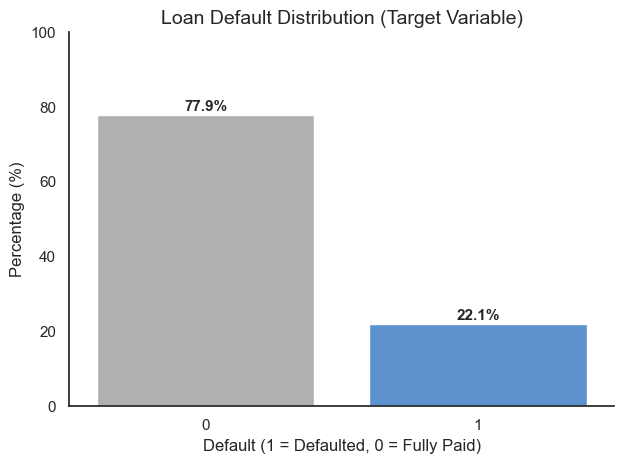

In [211]:
# Calculate percentage values
default_percent = df['Default'].value_counts(normalize=True) * 100

# Custom colors: grey for 0, strong blue for 1
colors = ['#B0B0B0', '#4A90E2']  # grey, bold blue

# Plot as bar chart with percentage on Y-axis
sns.barplot(
    x=default_percent.index,
    y=default_percent.values,
    palette=colors
)

# Styling
plt.title("Loan Default Distribution (Target Variable)", fontsize=14)
plt.xlabel("Default (1 = Defaulted, 0 = Fully Paid)", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.ylim(0, 100)

# Remove borders and gridlines
sns.despine()
plt.grid(False)

# Add percentage labels
for i, v in enumerate(default_percent.values):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()


Changing columns to correct data type

In [212]:
# Convert to object (string) type
cols_to_object = ['City', 'State', 'Zip', 'Industry', 'BankState']
df[cols_to_object] = df[cols_to_object].astype(str)

In [213]:
# Convert ApprovalDate to datetime
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], errors='coerce')

Converting the variables in project description to boolean

In [214]:
# NewExist to binary: 1 = New Business, 0 = Existing
df['Is_New'] = df['NewExist'].replace({2: 1, 1: 0})

# FranchiseCode to binary: 0/1 = Not Franchise, others = Franchise
df['Is_Franchise'] = df['FranchiseCode'].apply(lambda x: 0 if x in [0, 1] else 1)

# UrbanRural: 1 = Urban (1), 2 = Rural (0), anything else = NaN
df['Is_Rural'] = df['UrbanRural'].apply(lambda x: 1 if x == 2 else 0 if x == 1 else np.nan)

# LowDoc: 7 = Yes (1), 4 or other = No (0)
df['Is_LowDoc'] = df['LowDoc'].apply(lambda x: 1 if x == 7 else 0)

# RevLineCr: 16 = Yes (1), 12 or others = No (0)
df['Is_RevLineCr'] = df['RevLineCr'].apply(lambda x: 1 if x == 16 else 0)

# Optional: drop the old variables if you want
drop_old = ['MIS_Status', 'FranchiseCode', 'UrbanRural', 'LowDoc', 'RevLineCr', 'NewExist']
df.drop(columns=drop_old, inplace=True)



Mapping the Industry variable to match project description

In [215]:
# Convert Industry to string first (if not already)
df['Industry'] = df['Industry'].astype(str)

# Define mapping from first 2 digits to sector description
industry_mapping = {
    '11': 'Agriculture, forestry, fishing and hunting',
    '21': 'Mining, quarrying, and oil and gas extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale trade',
    '44': 'Retail trade',
    '45': 'Retail trade',
    '48': 'Transportation and warehousing',
    '49': 'Transportation and warehousing',
    '51': 'Information',
    '52': 'Finance and insurance',
    '53': 'Real estate and rental and leasing',
    '54': 'Professional, scientific, and technical services',
    '55': 'Management of companies and enterprises',
    '56': 'Administrative and support and waste management and remediation services',
    '61': 'Educational services',
    '62': 'Health care and social assistance',
    '71': 'Arts, entertainment, and recreation',
    '72': 'Accommodation and food services',
    '81': 'Other services (except public administration)',
    '92': 'Public administration'
}

# Create a new Industry column
df['Industry'] = df['Industry'].str[:2].map(industry_mapping)
df['Industry'] = df['Industry'].fillna('Other')

# Ensure it's an object
df['Industry'] = df['Industry'].astype('object')

In [216]:
df['Industry'].value_counts()

Industry
Other                                                                       166263
Retail trade                                                                102763
Other services (except public administration)                                56341
Construction                                                                 54866
Professional, scientific, and technical services                             54181
Manufacturing                                                                52267
Accommodation and food services                                              46158
Health care and social assistance                                            39036
Wholesale trade                                                              38705
Administrative and support and waste management and remediation services     28208
Transportation and warehousing                                               19110
Arts, entertainment, and recreation                                          1

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711197 entries, 1000014003 to 9996003010
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   City          711197 non-null  object        
 1   State         711197 non-null  object        
 2   Zip           711197 non-null  object        
 3   BankState     711197 non-null  object        
 4   ApprovalDate  711197 non-null  datetime64[ns]
 5   ApprovalFY    711197 non-null  int64         
 6   Term          711197 non-null  int64         
 7   NoEmp         711197 non-null  int64         
 8   CreateJob     711197 non-null  int64         
 9   RetainedJob   711197 non-null  int64         
 10  GrAppv        711197 non-null  int64         
 11  SBA_Appv      711197 non-null  int64         
 12  Industry      711197 non-null  object        
 13  Default       711197 non-null  int64         
 14  ApprovalYear  711197 non-null  int32         
 15  Is_New   

In [218]:
df.isna().sum().sort_values(ascending=False).head(10)

Is_Rural        268400
City                 0
State                0
Is_LowDoc            0
Is_Franchise         0
Is_New               0
ApprovalYear         0
Default              0
Industry             0
SBA_Appv             0
dtype: int64

In [219]:
def numeric_summary(df, target):
    results = []
    for col in df.select_dtypes(include=np.number).columns:
        if col == target: continue
        skewness = skew(df[col].dropna())
        kurt = kurtosis(df[col].dropna())
        z = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = (z > 3).mean() * 100
        na = df[col].isna().mean() * 100
        group_0 = df[df[target] == 0][col]
        group_1 = df[df[target] == 1][col]
        try:
            t_stat, p_val = ttest_ind(group_0.dropna(), group_1.dropna())
        except:
            t_stat, p_val = np.nan, np.nan
        results.append([col, skewness, kurt, outliers, na, t_stat, p_val])
    
    return pd.DataFrame(results, columns=[
        'Feature', 'Skewness', 'Kurtosis', '% Outliers',
        '% Missing', 'T-statistic', 'P-value'
    ]).set_index('Feature')
    
# Run it
num_summary = numeric_summary(df, 'Default')
display(num_summary.sort_values(by='P-value'))


,Skewness,Kurtosis,% Outliers,% Missing,T-statistic,P-value
Feature,,,,,,
ApprovalFY,-0.688105,-0.092005,0.397218,0.000000,-243.628820,0.000000e+00
Term,1.541716,3.109525,1.014768,0.000000,239.053657,0.000000e+00
SBA_Appv,4.291489,41.206871,2.539521,0.000000,45.786116,0.000000e+00
ApprovalYear,-0.692336,-0.080819,0.435885,0.000000,-243.468391,0.000000e+00
Is_LowDoc,1.984648,1.938829,0.000000,0.000000,107.568338,0.000000e+00
Is_RevLineCr,1.095499,-0.799881,0.000000,0.000000,-65.185791,0.000000e+00
GrAppv,4.350894,35.049177,2.389071,0.000000,33.138295,1.276319e-240
Is_Rural,1.730424,0.994367,0.000000,37.739192,30.674572,2.049897e-206
NoEmp,79.182690,7557.933897,0.132031,0.000000,19.405940,7.228169e-84


In [220]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create summary stats with quartiles
summary_stats = pd.DataFrame({
    'Variable Name': numeric_cols,
    '% Missing': [df[col].isna().mean() * 100 for col in numeric_cols],
    'Mean': [df[col].mean() for col in numeric_cols],
    'Standard Deviation': [df[col].std() for col in numeric_cols],
    'Minimum': [df[col].min() for col in numeric_cols],
    '25%': [df[col].quantile(0.25) for col in numeric_cols],
    '50% (Median)': [df[col].median() for col in numeric_cols],
    '75%': [df[col].quantile(0.75) for col in numeric_cols],
    'Maximum': [df[col].max() for col in numeric_cols],
    'Mode': [df[col].mode()[0] if not df[col].mode().empty else None for col in numeric_cols]
})

# Display
summary_stats.reset_index(drop=True, inplace=True)
display(summary_stats)


,Variable Name,% Missing,Mean,Standard Deviation,Minimum,25%,50% (Median),75%,Maximum,Mode
0,ApprovalFY,0.000000,2000.682087,5.914655,1962.0,1996.0,2002.0,2005.0,2014.0,2006.0
1,Term,0.000000,84.125365,52.074288,1.0,60.0,84.0,87.0,461.0,84.0
2,NoEmp,0.000000,10.589710,78.121164,0.0,2.0,4.0,9.0,9999.0,1.0
3,CreateJob,0.000000,9.483588,265.328331,0.0,0.0,0.0,1.0,8800.0,0.0
4,RetainedJob,0.000000,11.811722,265.339087,0.0,0.0,1.0,4.0,8800.0,0.0
5,GrAppv,0.000000,133717.037191,199049.216049,200.0,30000.0,65000.0,150000.0,5000000.0,50000.0
6,SBA_Appv,0.000000,99868.197460,153197.565965,100.0,17500.0,45000.0,116450.0,4500000.0,25000.0
7,Default,0.000000,0.221063,0.414963,0.0,0.0,0.0,0.0,1.0,0.0
8,Is_New,0.000000,0.292105,0.454731,0.0,0.0,0.0,1.0,1.0,0.0
9,Is_Franchise,0.000000,0.055307,0.228578,0.0,0.0,0.0,0.0,1.0,0.0


In [221]:
# Select categorical (object) columns
categorical_cols = df.select_dtypes(include='object').columns

# Create summary table
categorical_summary = pd.DataFrame({
    'Variable': categorical_cols,
    'Number of Distinct Categories': [df[col].nunique() for col in categorical_cols],
    '% Missing': [df[col].isna().mean() * 100 for col in categorical_cols]
})

# Round % Missing for readability
categorical_summary['% Missing'] = categorical_summary['% Missing'].round(2)

# Display
display(categorical_summary)

,Variable,Number of Distinct Categories,% Missing
0,City,28952,0.0
1,State,51,0.0
2,Zip,31904,0.0
3,BankState,56,0.0
4,Industry,21,0.0


In [222]:
df.columns

Index(['City', 'State', 'Zip', 'BankState', 'ApprovalDate', 'ApprovalFY',
       'Term', 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv',
       'Industry', 'Default', 'ApprovalYear', 'Is_New', 'Is_Franchise',
       'Is_Rural', 'Is_LowDoc', 'Is_RevLineCr'],
      dtype='object')

Analysis of 'Term'

In [223]:
for term in range(144, 244):
    subset = df[df['Term'] == term]
    if len(subset) > 0:
        default_rate = subset['Default'].mean()
        print(f"Term = {term:>2} months | Count = {len(subset):>5} | Default Rate = {default_rate:.3f}")

Term = 144 months | Count =  2751 | Default Rate = 0.045
Term = 145 months | Count =   141 | Default Rate = 0.426
Term = 146 months | Count =   151 | Default Rate = 0.444
Term = 147 months | Count =   183 | Default Rate = 0.432
Term = 148 months | Count =   134 | Default Rate = 0.455
Term = 149 months | Count =   141 | Default Rate = 0.546
Term = 150 months | Count =   234 | Default Rate = 0.278
Term = 151 months | Count =   116 | Default Rate = 0.578
Term = 152 months | Count =   111 | Default Rate = 0.477
Term = 153 months | Count =   121 | Default Rate = 0.488
Term = 154 months | Count =   119 | Default Rate = 0.571
Term = 155 months | Count =   124 | Default Rate = 0.403
Term = 156 months | Count =   785 | Default Rate = 0.103
Term = 157 months | Count =   116 | Default Rate = 0.560
Term = 158 months | Count =   106 | Default Rate = 0.509
Term = 159 months | Count =   125 | Default Rate = 0.504
Term = 160 months | Count =   108 | Default Rate = 0.472
Term = 161 months | Count =    

In [224]:
# Define bins and labels
bins = [0, 24, 48, 60, 84, df['Term'].max()]
labels = ['0–2 years', '2–4 years', '4–5 years', '5–7 years', '7+ years']

# Cut the 'Term' into bins
df['Term_Bin'] = pd.cut(df['Term'], bins=bins, labels=labels, right=False)

# Group by bins and calculate default rate and count
term_default_summary = df.groupby('Term_Bin')['Default'].agg(['count', 'mean']).rename(columns={'count': 'Loan Count', 'mean': 'Default Rate'})

display(term_default_summary)


/var/folders/sy/bxcftcdx75n3w7kv3ljkq2p40000gn/T/ipykernel_47289/2674802659.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  term_default_summary = df.groupby('Term_Bin')['Default'].agg(['count', 'mean']).rename(columns={'count': 'Loan Count', 'mean': 'Default Rate'})


,Loan Count,Default Rate
Term_Bin,,
0–2 years,56503,0.524574
2–4 years,74767,0.587425
4–5 years,43410,0.583322
5–7 years,144900,0.222312
7+ years,391616,0.066706


In [225]:
import pandas as pd

# Count loans where 'Term' is greater than 156 months (13 years)
count_long_term_loans = df[df['Term'] > 200].shape[0]
count_long_term_loans


36152

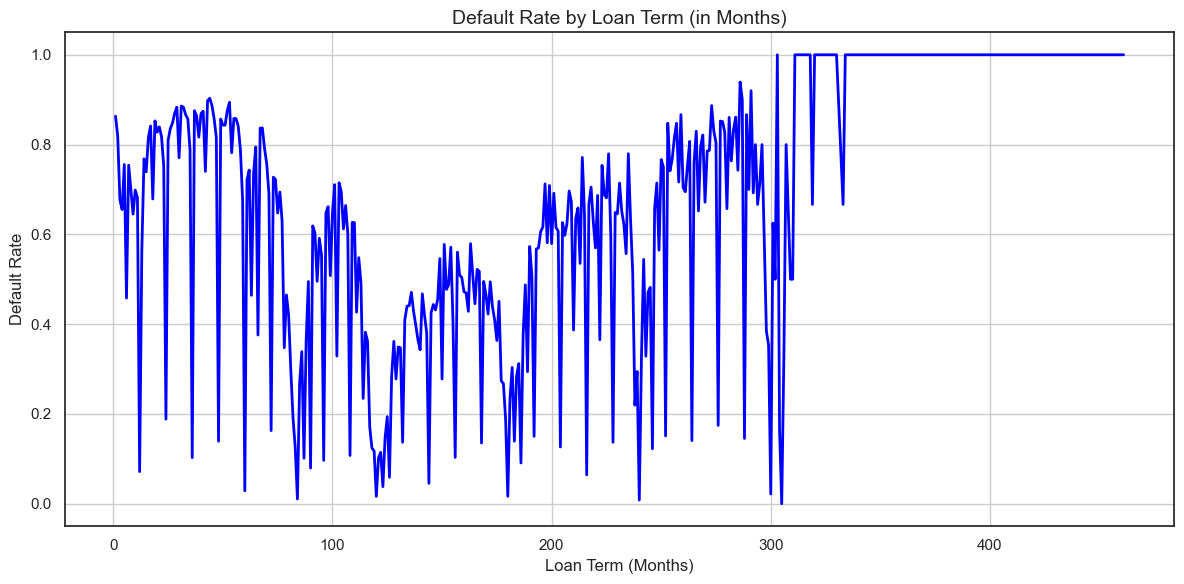

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Term and calculate mean default rate
term_default = df.groupby('Term')['Default'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(term_default['Term'], term_default['Default'], color='blue', linewidth=2)
plt.title('Default Rate by Loan Term (in Months)', fontsize=14)
plt.xlabel('Loan Term (Months)', fontsize=12)
plt.ylabel('Default Rate', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


/var/folders/sy/bxcftcdx75n3w7kv3ljkq2p40000gn/T/ipykernel_47289/2627597942.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_default = df.groupby('Term_Bin')['Default'].mean().reset_index()


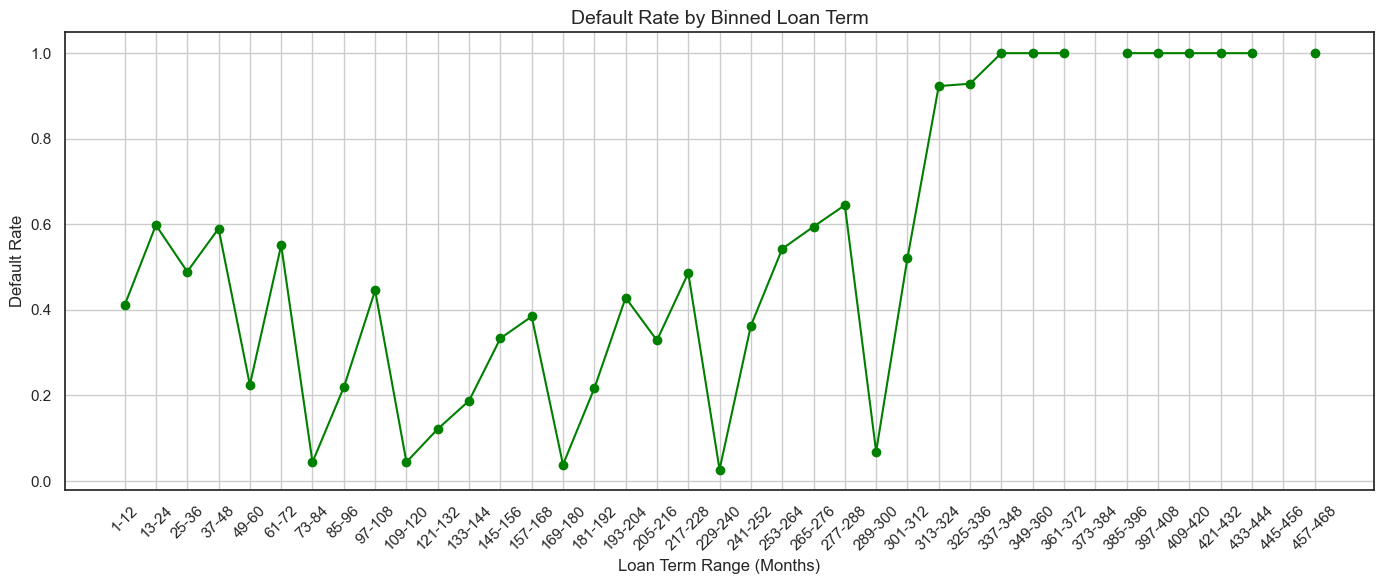

In [227]:
# Define bins (every 12 months up to max term)
bins = list(range(0, int(df['Term'].max()) + 12, 12))  # 0-12, 13-24, ...
labels = [f"{b+1}-{b+12}" for b in bins[:-1]]

# Bin the Term column
df['Term_Bin'] = pd.cut(df['Term'], bins=bins, labels=labels, right=True)

# Group by bins
binned_default = df.groupby('Term_Bin')['Default'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(binned_default['Term_Bin'], binned_default['Default'], marker='o', linestyle='-', color='green')
plt.xticks(rotation=45)
plt.title('Default Rate by Binned Loan Term', fontsize=14)
plt.xlabel('Loan Term Range (Months)', fontsize=12)
plt.ylabel('Default Rate', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [228]:
len(df)

711197

In [229]:
# Define bins and labels
bins = [0, 24, 48, 60, 84, df['Term'].max()]
labels = ['0–2 years', '2–4 years', '4–5 years', '5–7 years', '7+ years']

# Cut the 'Term' into bins
df['Term_Bin'] = pd.cut(df['Term'], bins=bins, labels=labels, right=False)

# Group by bins and calculate default rate and count
term_default_summary = df.groupby('Term_Bin')['Default'].agg(['count', 'mean']).rename(columns={'count': 'Loan Count', 'mean': 'Default Rate'})

display(term_default_summary)


/var/folders/sy/bxcftcdx75n3w7kv3ljkq2p40000gn/T/ipykernel_47289/2674802659.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  term_default_summary = df.groupby('Term_Bin')['Default'].agg(['count', 'mean']).rename(columns={'count': 'Loan Count', 'mean': 'Default Rate'})


,Loan Count,Default Rate
Term_Bin,,
0–2 years,56503,0.524574
2–4 years,74767,0.587425
4–5 years,43410,0.583322
5–7 years,144900,0.222312
7+ years,391616,0.066706


In [230]:
# Get top N longest-term loans (e.g. top 100)
top_n = 10  # or any number you prefer

# Sort by Term descending and get ApprovalFY (or ApprovalDate if FY is missing)
top_term_loans = df.sort_values(by='Term', ascending=False).head(top_n)

# Display ApprovalFY (or ApprovalDate if ApprovalFY is undefined)
top_term_loans[['Term', 'ApprovalFY', 'ApprovalDate']].reset_index(drop=True)

,Term,ApprovalFY,ApprovalDate
0,461,1982,1981-12-29
1,442,1973,1973-05-21
2,438,1991,1991-03-15
3,435,1984,1983-12-21
4,430,1976,1976-02-11
5,425,1987,1986-12-24
6,421,1985,1985-01-08
7,421,1983,1983-08-01
8,421,1970,1970-04-30
9,419,1987,1986-12-10


In [231]:
df = df.drop(columns = ['Term_Bin'])

Analysis of 'NoEmp'

In [232]:
df[df['NoEmp'] > 500]['NoEmp'].value_counts().sort_index()

NoEmp
505     4
510     3
512     1
515     1
520     1
       ..
9000    2
9090    1
9945    1
9992    1
9999    4
Name: count, Length: 159, dtype: int64

<Axes: >

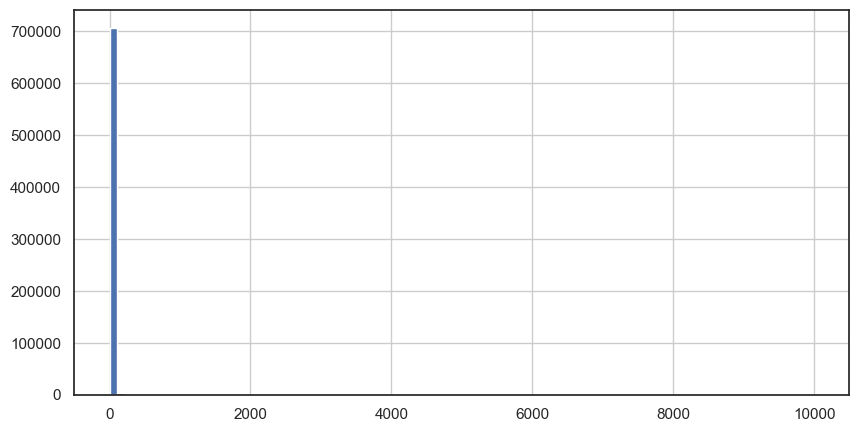

In [233]:
# Raw distribution
df['NoEmp'].hist(bins=100, figsize=(10,5))


<Axes: >

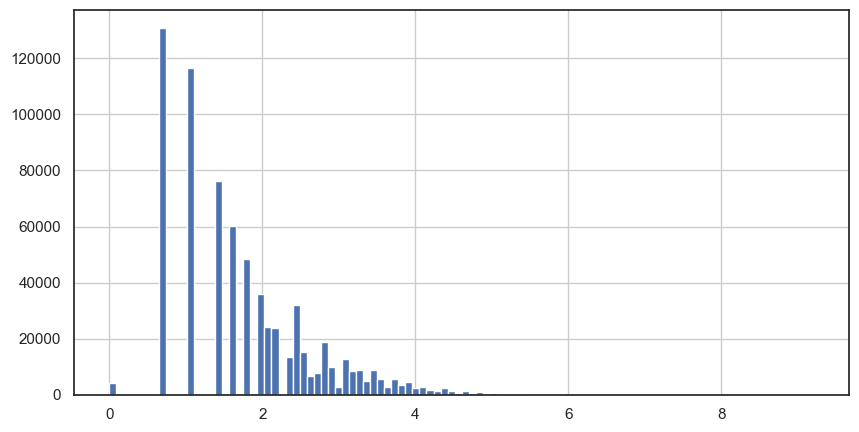

In [234]:
# Log scale if heavily right-skewed
import numpy as np
np.log1p(df['NoEmp']).hist(bins=100, figsize=(10,5))

In [235]:
bins = [0, 1, 5, 10, 50, 100, 500, df['NoEmp'].max()]
labels = ['0', '1-5', '6-10', '11-50', '51-100', '101-500', '500+']
df['Emp_Bin'] = pd.cut(df['NoEmp'], bins=bins, labels=labels, right=False)

emp_default_summary = df.groupby('Emp_Bin')['Default'].agg(['mean', 'count']).rename(columns={'mean': 'Default Rate', 'count': 'Loan Count'})
display(emp_default_summary)


/var/folders/sy/bxcftcdx75n3w7kv3ljkq2p40000gn/T/ipykernel_47289/2377497490.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emp_default_summary = df.groupby('Emp_Bin')['Default'].agg(['mean', 'count']).rename(columns={'mean': 'Default Rate', 'count': 'Loan Count'})


,Default Rate,Loan Count
Emp_Bin,,
0,0.364552,4271
1-5,0.251237,383399
6-10,0.219084,146154
11-50,0.161776,156074
51-100,0.100308,15582
101-500,0.089810,5378
500+,0.062687,335


In [236]:
df = df.drop(columns = ['Emp_Bin'])

In [237]:
df['Is_MicroBusiness'] = (df['NoEmp'] <= 5).astype(int)

In [238]:
df['Is_MicroBusiness'].value_counts()

Is_MicroBusiness
1    436027
0    275170
Name: count, dtype: int64

In [239]:
df['Is_SoloBusiness'] =(df['NoEmp'] <= 0).astype(int)

In [240]:
df['Is_SoloBusiness'].value_counts()

Is_SoloBusiness
0    706926
1      4271
Name: count, dtype: int64

In [241]:
df[df['NoEmp'] == 0][['GrAppv', 'SBA_Appv', 'Default']].describe()

,GrAppv,SBA_Appv,Default
count,4.271000e+03,4.271000e+03,4271.000000
mean,6.825909e+04,4.339668e+04,0.364552
std,1.132962e+05,8.368965e+04,0.481361
min,1.000000e+03,5.000000e+02,0.000000
25%,2.000000e+04,1.250000e+04,0.000000
50%,2.500000e+04,1.250000e+04,0.000000
75%,6.500000e+04,4.017500e+04,1.000000
max,2.000000e+06,1.500000e+06,1.000000


In [242]:
df[df['NoEmp'] == 0]['Default'].mean()


0.3645516272535706

In [243]:
df['NoEmp'].value_counts().sort_index().head(10)


NoEmp
0      4271
1    130729
2    116354
3     76133
4     60183
5     48357
6     36097
7     24308
8     23806
9     13586
Name: count, dtype: int64

In [244]:
df[df['NoEmp'] == 0]['Is_Franchise'].value_counts(normalize=True)


Is_Franchise
0    0.97284
1    0.02716
Name: proportion, dtype: float64

In [245]:
df[df['NoEmp'] == 0][['CreateJob', 'RetainedJob']].describe()

,CreateJob,RetainedJob
count,4271.000000,4271.000000
mean,2.706158,1.097869
std,16.342687,4.283214
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.000000
max,1000.000000,100.000000


In [246]:
df[df['NoEmp'] == 0][['CreateJob', 'RetainedJob']].describe()

,CreateJob,RetainedJob
count,4271.000000,4271.000000
mean,2.706158,1.097869
std,16.342687,4.283214
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.000000,0.000000
max,1000.000000,100.000000


In [247]:
df[df['NoEmp'] == 0]['ApprovalFY'].value_counts().sort_index()


ApprovalFY
1962       1
1965       1
1966       1
1967       1
1969       1
1980       1
1981       1
2003       5
2004      51
2005     271
2006     758
2007    1341
2008     982
2009     427
2010     171
2011     178
2012      59
2013      18
2014       3
Name: count, dtype: int64

<Axes: xlabel='NoEmp', ylabel='Default'>

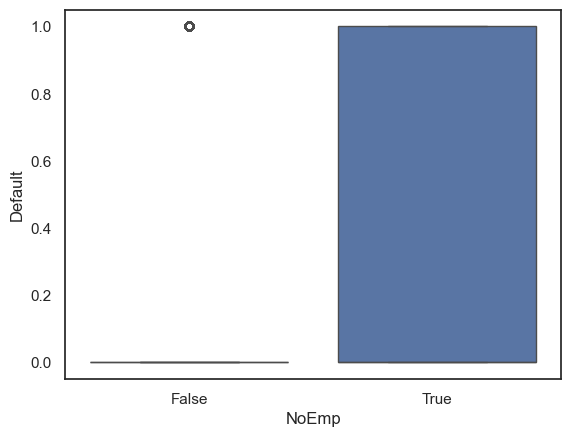

In [248]:
import seaborn as sns
sns.boxplot(data=df, x=(df['NoEmp'] == 0), y='Default')


In [249]:
bins = [-1, 1, 9, 49, 249, df['NoEmp'].max()]
labels = ['Solo', 'Micro (2–9)', 'Small (10–49)', 'Medium (50–249)', 'Large (250+)']

df['Emp_Size'] = pd.cut(df['NoEmp'], bins=bins, labels=labels)


In [250]:
df['Emp_Size'].value_counts()

Emp_Size
Micro (2–9)        398824
Small (10–49)      156074
Solo               135000
Medium (50–249)     20375
Large (250+)          924
Name: count, dtype: int64

In [251]:
# Filter for large businesses and calculate default rate
large_defaults = df[df['Emp_Size'] == 'Large (250+)']['Default'].agg(['count', 'mean'])
print(large_defaults)


count    924.000000
mean       0.080087
Name: Default, dtype: float64


In [252]:
# Filter for large businesses and calculate default rate
large_defaults = df[df['NoEmp'] == 0]['Default'].agg(['count', 'mean'])
print(large_defaults)


count    4271.000000
mean        0.364552
Name: Default, dtype: float64


In [253]:
# Filter for large businesses and calculate default rate
large_defaults = df[df['NoEmp'] == 1]['Default'].agg(['count', 'mean'])
print(large_defaults)


count    130729.00000
mean          0.26825
Name: Default, dtype: float64


/var/folders/sy/bxcftcdx75n3w7kv3ljkq2p40000gn/T/ipykernel_47289/3471675288.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  emp_size_summary = df.groupby('Emp_Size')['Default'].mean().sort_values(ascending=False)


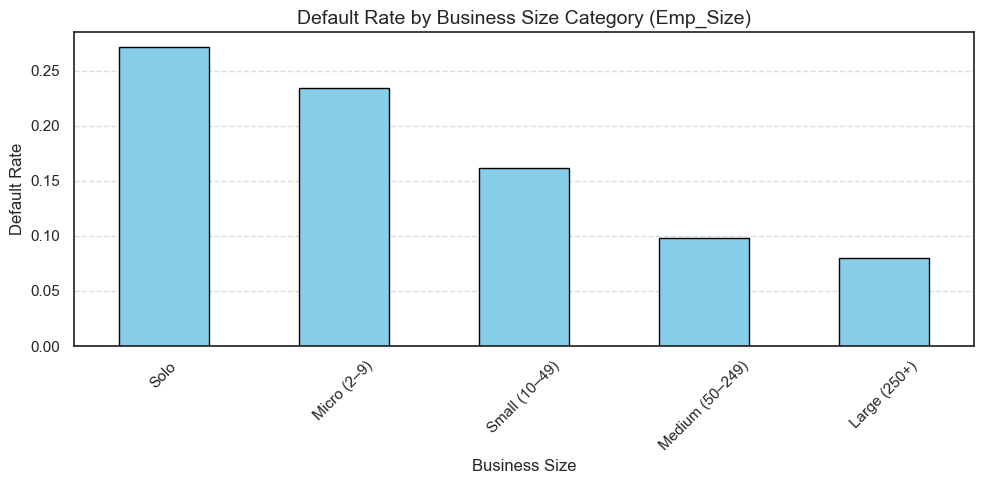

In [254]:
import matplotlib.pyplot as plt

# Group by Emp_Size and calculate default rate
emp_size_summary = df.groupby('Emp_Size')['Default'].mean().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 5))
emp_size_summary.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Default Rate by Business Size Category (Emp_Size)', fontsize=14)
plt.ylabel('Default Rate', fontsize=12)
plt.xlabel('Business Size', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [255]:
# Combine Large + Medium into 'Medium-Large'
df['Emp_Size_Adjusted'] = df['Emp_Size'].replace({
    'Large (250+)': 'Medium-Large',
    'Medium (50–249)': 'Medium-Large'
})

df = df.drop(columns = ['Emp_Size'])

/var/folders/sy/bxcftcdx75n3w7kv3ljkq2p40000gn/T/ipykernel_47289/4167915909.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Emp_Size_Adjusted'] = df['Emp_Size'].replace({


In [256]:
df.groupby('Emp_Size_Adjusted')['Default'].agg(['count', 'mean'])


/var/folders/sy/bxcftcdx75n3w7kv3ljkq2p40000gn/T/ipykernel_47289/897491562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Emp_Size_Adjusted')['Default'].agg(['count', 'mean'])


,count,mean
Emp_Size_Adjusted,,
Solo,135000,0.271296
Micro (2–9),398824,0.233878
Small (10–49),156074,0.161776
Medium-Large,21299,0.097141


In [257]:
# Create dummies and drop the reference category (Medium–Large)
emp_dummies = pd.get_dummies(df['Emp_Size_Adjusted'], prefix='EmpSize', drop_first=True)

# Add to original dataframe
df = pd.concat([df, emp_dummies], axis=1)

In [258]:
df = df.drop(columns = ['Emp_Size_Adjusted'])

In [259]:
df[df['NoEmp'] == 0].groupby('Default').size()

df[df['NoEmp'] == 0]['Is_Franchise'].value_counts(normalize=True)


Is_Franchise
0    0.97284
1    0.02716
Name: proportion, dtype: float64

In [260]:
df[df['NoEmp'] == 0].groupby('Default').size()

Default
0    2714
1    1557
dtype: int64

In [261]:
df['NoEmp'] = df['NoEmp'].replace(0, 1)

In [262]:
df.groupby('Default')['NoEmp'].describe()


,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,553978.0,11.552024,82.185793,1.0,2.0,4.0,10.0,9999.0
1,157219.0,7.226060,61.578230,1.0,2.0,3.0,7.0,9999.0


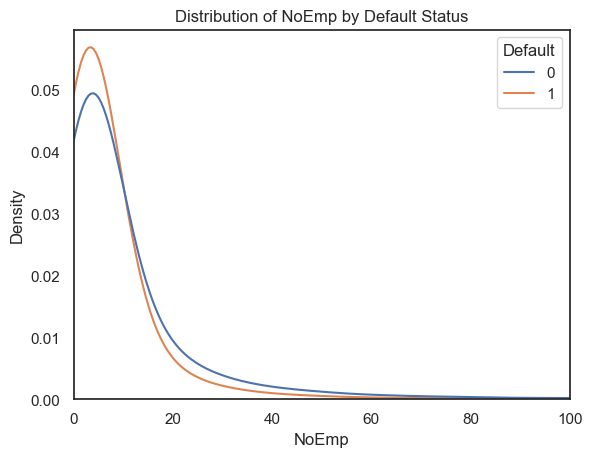

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x='NoEmp', hue='Default', common_norm=False, clip=(0, 100))
plt.xlim(0, 100)
plt.title('Distribution of NoEmp by Default Status')
plt.show()


<Axes: title={'center': 'Average NoEmp by Approval Year'}, xlabel='ApprovalFY'>

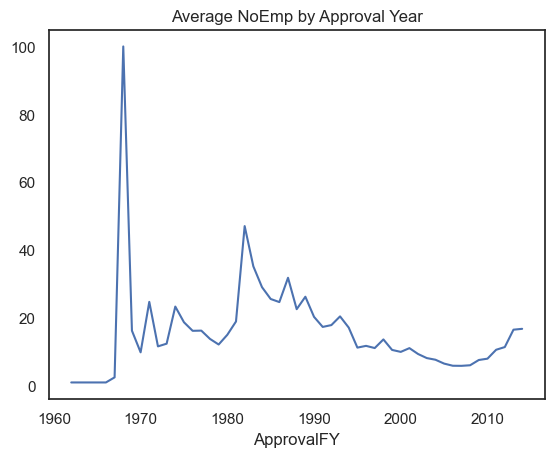

In [264]:
df.groupby('ApprovalFY')['NoEmp'].mean().plot(title='Average NoEmp by Approval Year')

In [265]:
df['Is_Solo'] = df['NoEmp'].isin([0, 1]).astype(int)

In [266]:
df = df.drop(columns = ['Is_MicroBusiness', 'Is_SoloBusiness', 'EmpSize_Micro (2–9)',
       'EmpSize_Small (10–49)', 'EmpSize_Medium-Large'])

In [267]:
df.shape

(711197, 21)

Analysis of 'CreateJob' and 'RetainedJob'

In [268]:
df['CreatedJobs_Any'] = (df['CreateJob'] > 0).astype(int)
df['RetainedJobs_Any'] = (df['RetainedJob'] > 0).astype(int)

In [269]:
created_defaults = df.groupby('CreatedJobs_Any')['Default'].agg(['count', 'mean']).rename(columns={'mean': 'Default Rate'})
retained_defaults = df.groupby('RetainedJobs_Any')['Default'].agg(['count', 'mean']).rename(columns={'mean': 'Default Rate'})

print("Default Rate by CreatedJobs_Any:")
display(created_defaults)

print("\nDefault Rate by RetainedJobs_Any:")
display(retained_defaults)


Default Rate by CreatedJobs_Any:


,count,Default Rate
CreatedJobs_Any,,
0,528193,0.186383
1,183004,0.321157



Default Rate by RetainedJobs_Any:


,count,Default Rate
RetainedJobs_Any,,
0,351541,0.119989
1,359656,0.319856


In [270]:
df[['CreateJob', 'RetainedJob', 'NoEmp']].corr()

,CreateJob,RetainedJob,NoEmp
CreateJob,1.000000,0.996752,0.008082
RetainedJob,0.996752,1.000000,0.012203
NoEmp,0.008082,0.012203,1.000000


In [271]:
df[['CreatedJobs_Any', 'Is_Solo']].corr()


,CreatedJobs_Any,Is_Solo
CreatedJobs_Any,1.000000,0.052582
Is_Solo,0.052582,1.000000


In [272]:
pd.crosstab(df['Is_Solo'], df['CreatedJobs_Any'], normalize='index')


CreatedJobs_Any,0,1
Is_Solo,,
0,0.753808,0.246192
1,0.695193,0.304807


In [273]:
df = df.drop(columns = ['CreateJob', 'RetainedJob'])

Analysis of 'GrAppv' and 'SBA_Appv'

In [274]:
df['SBA_Guarantee_Ratio'] = df['SBA_Appv'] / df['GrAppv'] # How much of the loan was guaranteed

<Axes: xlabel='GrAppv', ylabel='Density'>

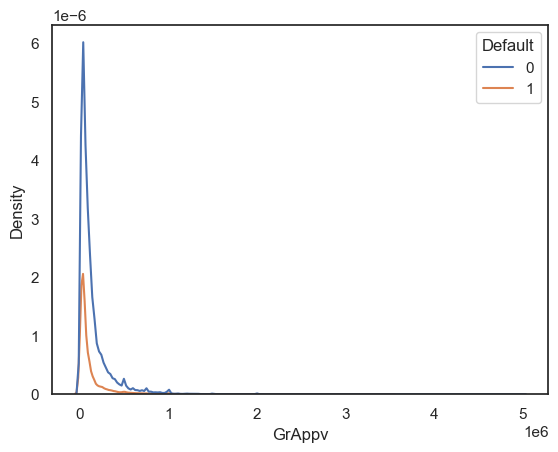

In [275]:
df.groupby('Default')['GrAppv'].describe()
sns.kdeplot(data=df, x='GrAppv', hue='Default')

<Axes: xlabel='SBA_Guarantee_Ratio', ylabel='Density'>

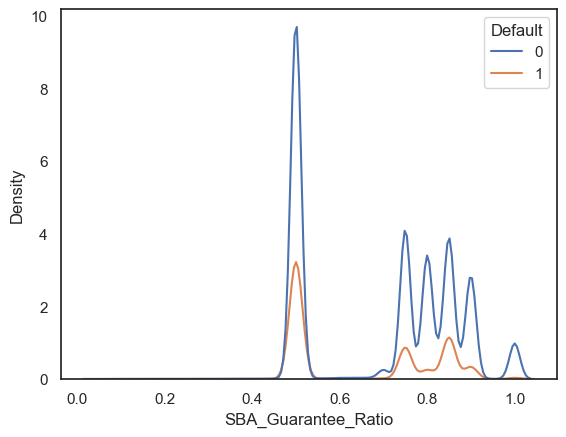

In [276]:
df.groupby('Default')['SBA_Guarantee_Ratio'].describe()
sns.kdeplot(data=df, x='SBA_Guarantee_Ratio', hue='Default')

Analysis of 'State'

In [277]:
# 51 unique, 51st likely represents united states

In [278]:
df['State'].value_counts()

State
4     88140
43    56803
34    49979
9     32270
38    30554
35    26577
14    24271
19    21790
31    18892
23    18808
47    18278
24    17598
10    16817
22    16576
48    16267
5     14925
44    13786
3     11821
27    11564
20    11447
15    11115
45    10454
6     10332
30    10178
12    10138
16     9930
37     8354
36     8235
18     8076
39     7899
42     7662
26     7427
13     7368
1      6819
17     6410
25     6222
33     6040
2      5372
29     5330
32     4918
21     4798
46     4671
40     4522
28     4323
41     3687
11     3198
49     2828
50     2285
0      2104
8      1988
7      1351
Name: count, dtype: int64

In [279]:
min_samples = 1000
state_counts = df['State'].value_counts()
valid_states = state_counts[state_counts >= min_samples].index

In [280]:
# Loop through each unique State
for state in valid_states:
    subset = df[df['State'] == state]
    total = len(subset)
    defaults = subset['Default'].value_counts(normalize=True)

    print(f"\nState: {state}")
    print(f"Total loans: {total}")
    print(f"Proportion Defaulted (1): {defaults.get(1, 0):.2%}")
    print(f"Proportion Fully Paid (0): {defaults.get(0, 0):.2%}")



State: 4
Total loans: 88140
Proportion Defaulted (1): 27.33%
Proportion Fully Paid (0): 72.67%

State: 43
Total loans: 56803
Proportion Defaulted (1): 23.27%
Proportion Fully Paid (0): 76.73%

State: 34
Total loans: 49979
Proportion Defaulted (1): 22.94%
Proportion Fully Paid (0): 77.06%

State: 9
Total loans: 32270
Proportion Defaulted (1): 34.82%
Proportion Fully Paid (0): 65.18%

State: 38
Total loans: 30554
Proportion Defaulted (1): 16.78%
Proportion Fully Paid (0): 83.22%

State: 35
Total loans: 26577
Proportion Defaulted (1): 20.15%
Proportion Fully Paid (0): 79.85%

State: 14
Total loans: 24271
Proportion Defaulted (1): 27.61%
Proportion Fully Paid (0): 72.39%

State: 19
Total loans: 21790
Proportion Defaulted (1): 14.97%
Proportion Fully Paid (0): 85.03%

State: 31
Total loans: 18892
Proportion Defaulted (1): 25.45%
Proportion Fully Paid (0): 74.55%

State: 23
Total loans: 18808
Proportion Defaulted (1): 15.10%
Proportion Fully Paid (0): 84.90%

State: 47
Total loans: 18278
Pr

In [281]:
# Set thresholds
min_samples = 1000                # Minimum number of loans required per state
risk_threshold = 0.25             # Default rate threshold to flag high-risk states

# Step 1: Filter for states with sufficient sample size
state_counts = df['State'].value_counts()
valid_states = state_counts[state_counts >= min_samples].index

# Step 2: Compute default rates only for valid states
state_defaults = df[df['State'].isin(valid_states)].groupby('State')['Default'].mean()

# Step 3: Identify high-risk states based on threshold
high_risk_states = state_defaults[state_defaults > risk_threshold].index.tolist()

# Step 4: Create HighRisk_State binary column
df['HighRisk_State'] = df['State'].apply(lambda x: 1 if x in high_risk_states else 0)

# Optional: Check balance of new variable
print(df['HighRisk_State'].value_counts())

HighRisk_State
0    482835
1    228362
Name: count, dtype: int64


In [282]:
df = df.drop(columns = ['State'])

Analysis of 'City' and 'Zip'

In [283]:
city_counts = df['City'].value_counts()


In [284]:
city_counts

City
12503    8666
15659    8425
19644    7072
4602     5172
17408    4614
         ... 
4479        1
12792       1
29792       1
7108        1
26271       1
Name: count, Length: 28952, dtype: int64

In [285]:
valid_cities = city_counts[city_counts >= min_samples].index

In [286]:
len(valid_cities)

74

In [287]:
df = df.drop(columns = ['City', 'Zip'])

In [288]:
# Dropping as both too granular

Analysis of 'Bank'

In [289]:
# Too granular, not really relevant either

Analysis of 'BankState'

In [290]:
# Similar to above, not really relevant I doubt, already have State to handle geography, likely to be similar to state
# Based on customer

In [291]:
'''

# Set thresholds
min_samples = 1000                # Minimum number of loans required per state
risk_threshold = 0.25             # Default rate threshold to flag high-risk states

# Step 1: Filter for states with sufficient sample size
state_counts = df['BankState'].value_counts()
valid_states = state_counts[state_counts >= min_samples].index

# Step 2: Compute default rates only for valid states
state_defaults = df[df['BankState'].isin(valid_states)].groupby('BankState')['Default'].mean()

# Step 3: Identify high-risk states based on threshold
high_risk_states = state_defaults[state_defaults > risk_threshold].index.tolist()

# Step 4: Create HighRisk_State binary column
df['HighRisk_BankState'] = df['BankState'].apply(lambda x: 1 if x in high_risk_states else 0)

# Optional: Check balance of new variable
print(df['HighRisk_BankState'].value_counts())

'''

"\n\n# Set thresholds\nmin_samples = 1000                # Minimum number of loans required per state\nrisk_threshold = 0.25             # Default rate threshold to flag high-risk states\n\n# Step 1: Filter for states with sufficient sample size\nstate_counts = df['BankState'].value_counts()\nvalid_states = state_counts[state_counts >= min_samples].index\n\n# Step 2: Compute default rates only for valid states\nstate_defaults = df[df['BankState'].isin(valid_states)].groupby('BankState')['Default'].mean()\n\n# Step 3: Identify high-risk states based on threshold\nhigh_risk_states = state_defaults[state_defaults > risk_threshold].index.tolist()\n\n# Step 4: Create HighRisk_State binary column\ndf['HighRisk_BankState'] = df['BankState'].apply(lambda x: 1 if x in high_risk_states else 0)\n\n# Optional: Check balance of new variable\nprint(df['HighRisk_BankState'].value_counts())\n\n"

In [292]:
# df[['HighRisk_BankState', 'HighRisk_State']].corr()

In [293]:
# df.columns

In [294]:
# df = df.drop(columns = ['Bank', 'BankState', 'HighRisk_BankState'])

In [295]:
df = df.drop(columns = ['BankState'])

Analysis of 'Industry'

In [296]:
df['Industry'].value_counts()

Industry
Other                                                                       166263
Retail trade                                                                102763
Other services (except public administration)                                56341
Construction                                                                 54866
Professional, scientific, and technical services                             54181
Manufacturing                                                                52267
Accommodation and food services                                              46158
Health care and social assistance                                            39036
Wholesale trade                                                              38705
Administrative and support and waste management and remediation services     28208
Transportation and warehousing                                               19110
Arts, entertainment, and recreation                                          1

In [297]:
df.shape

(711197, 19)

In [298]:
# Step 1: Filter
industry_counts = df['Industry'].value_counts()
valid_industries = industry_counts[industry_counts >= 1000].index
valid_industries = valid_industries[valid_industries != 'Other']

# Step 2: Default rates
industry_defaults = df[df['Industry'].isin(valid_industries)].groupby('Industry')['Default'].mean()

# Step 3: Define risky industries (e.g. >25% default)
high_risk_industries = industry_defaults[industry_defaults > 0.25].index.tolist()

# Step 4: Create binary variable
df['HighRisk_Industry'] = df['Industry'].apply(lambda x: 1 if x in high_risk_industries else 0)


In [299]:
df['HighRisk_Industry'].value_counts()

HighRisk_Industry
0    359967
1    351230
Name: count, dtype: int64

In [300]:
df = df.drop(columns = ['Industry'])

Analysis of 'ApprovalDate' and 'ApprovalFY'

<Axes: title={'center': 'Default Rate by Approval Year'}, xlabel='ApprovalFY'>

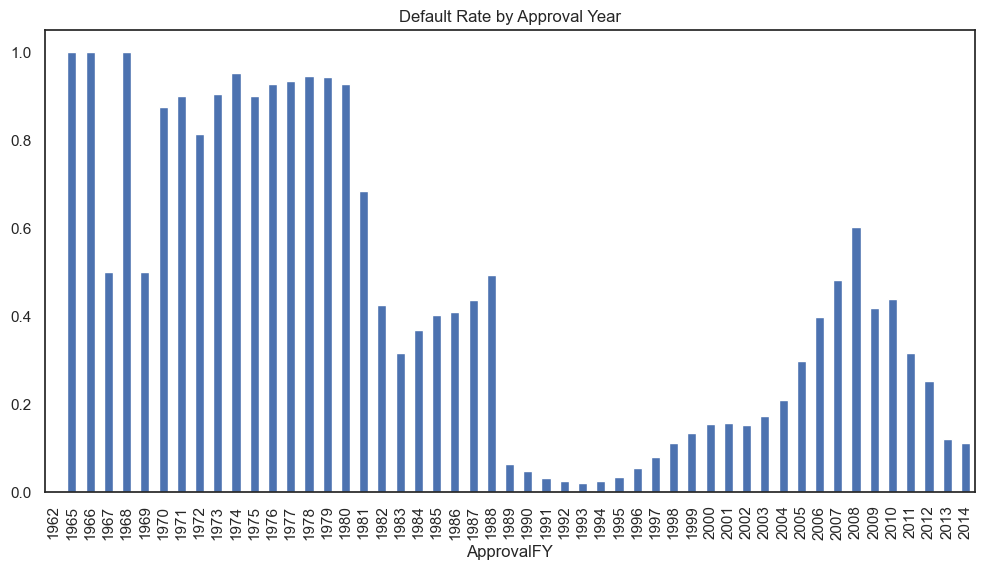

In [301]:
df.groupby('ApprovalFY')['Default'].mean().plot(kind='bar', figsize=(12,6), title='Default Rate by Approval Year')


In [302]:
for year in sorted(df['ApprovalFY'].unique()):
    subset = df[df['ApprovalFY'] == year]
    total = len(subset)
    default_rate = subset['Default'].mean()
    print(f"Year: {year}, Total Loans: {total}, Default Rate: {default_rate:.2%}")


Year: 1962, Total Loans: 1, Default Rate: 0.00%
Year: 1965, Total Loans: 1, Default Rate: 100.00%
Year: 1966, Total Loans: 1, Default Rate: 100.00%
Year: 1967, Total Loans: 2, Default Rate: 50.00%
Year: 1968, Total Loans: 2, Default Rate: 100.00%
Year: 1969, Total Loans: 4, Default Rate: 50.00%
Year: 1970, Total Loans: 8, Default Rate: 87.50%
Year: 1971, Total Loans: 20, Default Rate: 90.00%
Year: 1972, Total Loans: 27, Default Rate: 81.48%
Year: 1973, Total Loans: 52, Default Rate: 90.38%
Year: 1974, Total Loans: 42, Default Rate: 95.24%
Year: 1975, Total Loans: 30, Default Rate: 90.00%
Year: 1976, Total Loans: 84, Default Rate: 92.86%
Year: 1977, Total Loans: 137, Default Rate: 93.43%
Year: 1978, Total Loans: 241, Default Rate: 94.61%
Year: 1979, Total Loans: 350, Default Rate: 94.29%
Year: 1980, Total Loans: 477, Default Rate: 92.66%
Year: 1981, Total Loans: 627, Default Rate: 68.42%
Year: 1982, Total Loans: 719, Default Rate: 42.42%
Year: 1983, Total Loans: 1683, Default Rate: 31.6

In [303]:
df['ApprovalYear'] = df['ApprovalDate'].dt.year
df['ApprovalYear'].value_counts()

ApprovalYear
2006    67955
2005    63192
2004    61482
2007    59170
2003    51979
2002    37005
1994    33337
1995    33210
1996    30360
2001    28817
1997    28094
1999    27488
2000    27021
1998    26244
1993    22107
1992    18877
2008    17937
1991    14711
1990    13536
1989    13528
2009     9124
2010     4420
1988     4327
2011     2487
1986     2194
1987     2137
1984     1989
1985     1978
1983     1847
2012     1112
1982      852
1981      597
1980      574
2013      414
1979      360
1978      268
1977      141
1976       88
1975       49
1972       46
1973       46
1974       32
1970       19
2014       18
1971       15
1969        4
1968        3
1967        3
1966        1
1961        1
1964        1
Name: count, dtype: int64

In [304]:
df[df['ApprovalYear'] > 2025][['ApprovalDate', 'ApprovalFY', 'ApprovalYear', 'Default']]

,ApprovalDate,ApprovalFY,ApprovalYear,Default
LoanNr_ChkDgt,,,,


In [305]:
df[df['ApprovalYear'] != df['ApprovalFY']][['ApprovalDate', 'ApprovalFY', 'ApprovalYear']]


,ApprovalDate,ApprovalFY,ApprovalYear
LoanNr_ChkDgt,,,
1000655003,1996-10-04,1997,1996
1001775006,1997-10-09,1998,1997
1001785009,1997-10-10,1998,1997
1001795001,1997-10-10,1998,1997
1001805002,1997-10-14,1998,1997
...,...,...,...
9874303008,1996-12-31,1997,1996
9874323003,1996-12-31,1997,1996
9874343009,1996-12-31,1997,1996


In [306]:
# Fix ApprovalDate if its year is wrongly in the future (> 2025)
df['ApprovalDate'] = df['ApprovalDate'].apply(
    lambda d: d.replace(year=d.year - 100) if d.year > 2025 else d
)


df['ApprovalDate'].dt.year.value_counts()

ApprovalDate
2006    67955
2005    63192
2004    61482
2007    59170
2003    51979
2002    37005
1994    33337
1995    33210
1996    30360
2001    28817
1997    28094
1999    27488
2000    27021
1998    26244
1993    22107
1992    18877
2008    17937
1991    14711
1990    13536
1989    13528
2009     9124
2010     4420
1988     4327
2011     2487
1986     2194
1987     2137
1984     1989
1985     1978
1983     1847
2012     1112
1982      852
1981      597
1980      574
2013      414
1979      360
1978      268
1977      141
1976       88
1975       49
1972       46
1973       46
1974       32
1970       19
2014       18
1971       15
1969        4
1968        3
1967        3
1966        1
1961        1
1964        1
Name: count, dtype: int64

In [307]:
df['ApprovalYear'].value_counts()

ApprovalYear
2006    67955
2005    63192
2004    61482
2007    59170
2003    51979
2002    37005
1994    33337
1995    33210
1996    30360
2001    28817
1997    28094
1999    27488
2000    27021
1998    26244
1993    22107
1992    18877
2008    17937
1991    14711
1990    13536
1989    13528
2009     9124
2010     4420
1988     4327
2011     2487
1986     2194
1987     2137
1984     1989
1985     1978
1983     1847
2012     1112
1982      852
1981      597
1980      574
2013      414
1979      360
1978      268
1977      141
1976       88
1975       49
1972       46
1973       46
1974       32
1970       19
2014       18
1971       15
1969        4
1968        3
1967        3
1966        1
1961        1
1964        1
Name: count, dtype: int64

In [308]:
df['ApprovalMonth'] = df['ApprovalDate'].dt.month
df['ApprovalQuarter'] = df['ApprovalDate'].dt.quarter

<Axes: title={'center': 'Default Rate by Approval Month'}, xlabel='ApprovalMonth'>

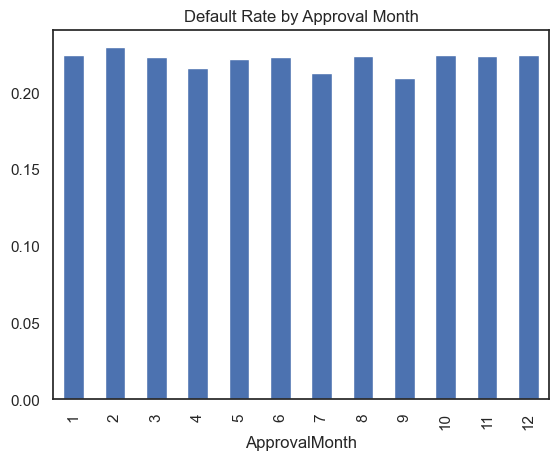

In [309]:
df.groupby('ApprovalMonth')['Default'].mean().plot(kind='bar', title='Default Rate by Approval Month')

In [310]:
for year in sorted(df['ApprovalMonth'].unique()):
    subset = df[df['ApprovalMonth'] == year]
    total = len(subset)
    default_rate = subset['Default'].mean()
    print(f"Year: {year}, Total Loans: {total}, Default Rate: {default_rate:.2%}")


Year: 1, Total Loans: 52691, Default Rate: 22.46%
Year: 2, Total Loans: 52571, Default Rate: 22.95%
Year: 3, Total Loans: 66398, Default Rate: 22.32%
Year: 4, Total Loans: 63081, Default Rate: 21.60%
Year: 5, Total Loans: 60297, Default Rate: 22.15%
Year: 6, Total Loans: 61438, Default Rate: 22.30%
Year: 7, Total Loans: 60383, Default Rate: 21.28%
Year: 8, Total Loans: 62599, Default Rate: 22.35%
Year: 9, Total Loans: 65008, Default Rate: 20.93%
Year: 10, Total Loans: 56731, Default Rate: 22.44%
Year: 11, Total Loans: 55045, Default Rate: 22.38%
Year: 12, Total Loans: 54955, Default Rate: 22.44%


<Axes: title={'center': 'Default Rate by Approval Quarter'}, xlabel='ApprovalQuarter'>

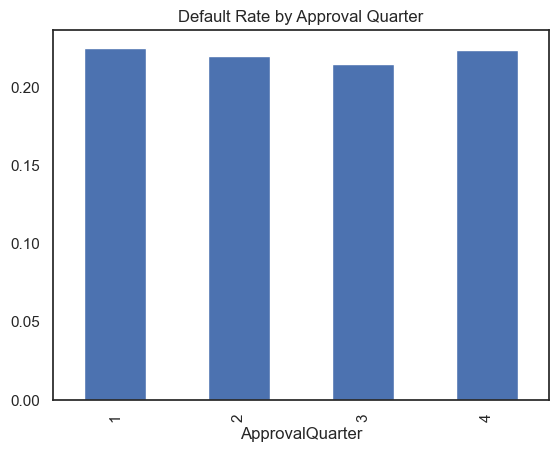

In [311]:
df.groupby('ApprovalQuarter')['Default'].mean().plot(kind='bar', title='Default Rate by Approval Quarter')


In [312]:
for year in sorted(df['ApprovalQuarter'].unique()):
    subset = df[df['ApprovalQuarter'] == year]
    total = len(subset)
    default_rate = subset['Default'].mean()
    print(f"Year: {year}, Total Loans: {total}, Default Rate: {default_rate:.2%}")


Year: 1, Total Loans: 171660, Default Rate: 22.56%
Year: 2, Total Loans: 184816, Default Rate: 22.01%
Year: 3, Total Loans: 187990, Default Rate: 21.51%
Year: 4, Total Loans: 166731, Default Rate: 22.42%


In [313]:
df.columns

Index(['ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'GrAppv', 'SBA_Appv',
       'Default', 'ApprovalYear', 'Is_New', 'Is_Franchise', 'Is_Rural',
       'Is_LowDoc', 'Is_RevLineCr', 'Is_Solo', 'CreatedJobs_Any',
       'RetainedJobs_Any', 'SBA_Guarantee_Ratio', 'HighRisk_State',
       'HighRisk_Industry', 'ApprovalMonth', 'ApprovalQuarter'],
      dtype='object')

In [314]:
df = df.drop(columns = ['ApprovalDate', 'ApprovalFY', 'ApprovalMonth', 'ApprovalQuarter', 'ApprovalYear'])

Analysis of "Is_Rural" (lots of this was already done in UrbanRural section towards the beginning of the notebook)

In [315]:
df.isna().sum().sort_values(ascending=False).head(10)

Is_Rural        268400
Term                 0
NoEmp                0
GrAppv               0
SBA_Appv             0
Default              0
Is_New               0
Is_Franchise         0
Is_LowDoc            0
Is_RevLineCr         0
dtype: int64

In [316]:
df['Is_Rural'].value_counts(normalize=True)

Is_Rural
0.0    0.827151
1.0    0.172849
Name: proportion, dtype: float64

In [317]:
# Check the proportion of missing or undefined values in the 'Is_Rural' column
missing_rural_pct = df['Is_Rural'].isna().mean() * 100
missing_rural_pct

37.73919181323881

In [318]:

df = df.drop(columns = ['Is_Rural'])

Multicollinearity Analysis

In [319]:
df.columns

Index(['Term', 'NoEmp', 'GrAppv', 'SBA_Appv', 'Default', 'Is_New',
       'Is_Franchise', 'Is_LowDoc', 'Is_RevLineCr', 'Is_Solo',
       'CreatedJobs_Any', 'RetainedJobs_Any', 'SBA_Guarantee_Ratio',
       'HighRisk_State', 'HighRisk_Industry'],
      dtype='object')

In [320]:
# 2. Compute full correlation matrix
corr_matrix = df.corr()

# 4. Get correlations with target variable 'Default'
target_corr = corr_matrix['Default'].drop('Default')  # exclude correlation with itself

# 5. Sort by absolute correlation
top_corr = target_corr.loc[target_corr.abs().sort_values(ascending=False).index]

# 6. Display top 40 most correlated features with 'Default'
top_40 = top_corr.head(40)
print("Top 40 features most correlated with 'Default':\n")
print(top_40)


Top 40 features most correlated with 'Default':

Term                  -0.272721
RetainedJobs_Any       0.240809
HighRisk_Industry      0.157054
CreatedJobs_Any        0.141983
SBA_Guarantee_Ratio   -0.141519
Is_LowDoc             -0.126528
HighRisk_State         0.110985
Is_RevLineCr           0.077066
Is_Solo                0.058596
SBA_Appv              -0.054213
GrAppv                -0.039265
NoEmp                 -0.022979
Is_Franchise          -0.012634
Is_New                 0.010444
Name: Default, dtype: float64


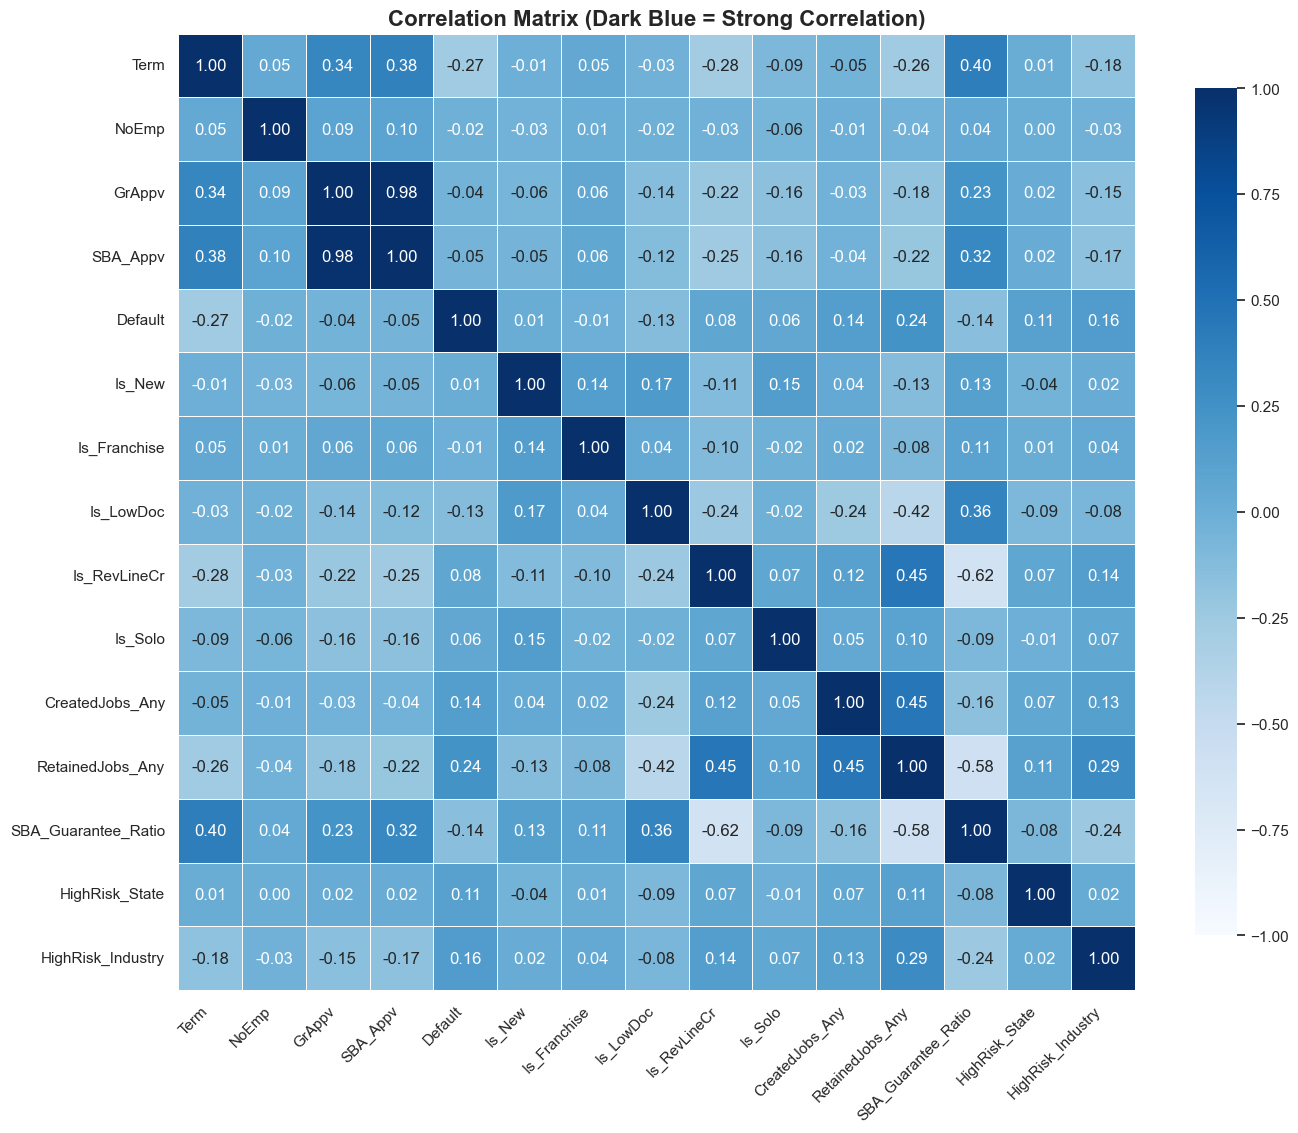

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure all numeric columns are used
corr_matrix = df.corr(numeric_only=True)

# Set up the plot
plt.figure(figsize=(14, 12))
sns.set(style="white")

# Create full heatmap (no mask)
sns.heatmap(
    corr_matrix,
    cmap='Blues',  # dark blue for strong correlation
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8},
    vmin=-1,
    vmax=1
)

# Titles and layout
plt.title("Correlation Matrix (Dark Blue = Strong Correlation)", fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [322]:
# Compute correlation matrix
corr_matrix = df.corr()

# Unstack into pairwise format
corr_pairs = corr_matrix.abs().unstack().reset_index()
corr_pairs.columns = ['Variable_1', 'Variable_2', 'Abs_Correlation']

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs['Variable_1'] != corr_pairs['Variable_2']]

# Drop duplicate pairs (keep only one of A-B and B-A)
corr_pairs['pair'] = corr_pairs.apply(lambda row: tuple(sorted([row['Variable_1'], row['Variable_2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset='pair').drop(columns='pair')

# Sort by absolute correlation
top_40_corr = corr_pairs.sort_values(by='Abs_Correlation', ascending=False).head(40)

# Display
print("Top 40 strongest absolute correlations between any variables:\n")
print(top_40_corr)

Top 40 strongest absolute correlations between any variables:

              Variable_1           Variable_2  Abs_Correlation
33                GrAppv             SBA_Appv         0.978326
132         Is_RevLineCr  SBA_Guarantee_Ratio         0.616610
177     RetainedJobs_Any  SBA_Guarantee_Ratio         0.583085
131         Is_RevLineCr     RetainedJobs_Any         0.450110
161      CreatedJobs_Any     RetainedJobs_Any         0.447813
116            Is_LowDoc     RetainedJobs_Any         0.419897
12                  Term  SBA_Guarantee_Ratio         0.399871
3                   Term             SBA_Appv         0.382248
117            Is_LowDoc  SBA_Guarantee_Ratio         0.357632
2                   Term               GrAppv         0.336988
57              SBA_Appv  SBA_Guarantee_Ratio         0.324443
179     RetainedJobs_Any    HighRisk_Industry         0.293885
8                   Term         Is_RevLineCr         0.276509
4                   Term              Default         0

In [323]:
df = df.drop(columns = ['SBA_Appv'])

In [324]:
# Compute correlation matrix
corr_matrix = df.corr()

# Unstack into pairwise format
corr_pairs = corr_matrix.abs().unstack().reset_index()
corr_pairs.columns = ['Variable_1', 'Variable_2', 'Abs_Correlation']

# Remove self-correlations
corr_pairs = corr_pairs[corr_pairs['Variable_1'] != corr_pairs['Variable_2']]

# Drop duplicate pairs (keep only one of A-B and B-A)
corr_pairs['pair'] = corr_pairs.apply(lambda row: tuple(sorted([row['Variable_1'], row['Variable_2']])), axis=1)
corr_pairs = corr_pairs.drop_duplicates(subset='pair').drop(columns='pair')

# Sort by absolute correlation
top_40_corr = corr_pairs.sort_values(by='Abs_Correlation', ascending=False).head(40)

# Display
print("Top 40 strongest absolute correlations between any variables:\n")
print(top_40_corr)

Top 40 strongest absolute correlations between any variables:

              Variable_1           Variable_2  Abs_Correlation
109         Is_RevLineCr  SBA_Guarantee_Ratio         0.616610
151     RetainedJobs_Any  SBA_Guarantee_Ratio         0.583085
108         Is_RevLineCr     RetainedJobs_Any         0.450110
136      CreatedJobs_Any     RetainedJobs_Any         0.447813
94             Is_LowDoc     RetainedJobs_Any         0.419897
11                  Term  SBA_Guarantee_Ratio         0.399871
95             Is_LowDoc  SBA_Guarantee_Ratio         0.357632
2                   Term               GrAppv         0.336988
153     RetainedJobs_Any    HighRisk_Industry         0.293885
7                   Term         Is_RevLineCr         0.276509
3                   Term              Default         0.272721
10                  Term     RetainedJobs_Any         0.259669
93             Is_LowDoc      CreatedJobs_Any         0.244020
91             Is_LowDoc         Is_RevLineCr         0

In [325]:
len(df)

711197

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711197 entries, 1000014003 to 9996003010
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Term                 711197 non-null  int64  
 1   NoEmp                711197 non-null  int64  
 2   GrAppv               711197 non-null  int64  
 3   Default              711197 non-null  int64  
 4   Is_New               711197 non-null  int64  
 5   Is_Franchise         711197 non-null  int64  
 6   Is_LowDoc            711197 non-null  int64  
 7   Is_RevLineCr         711197 non-null  int64  
 8   Is_Solo              711197 non-null  int64  
 9   CreatedJobs_Any      711197 non-null  int64  
 10  RetainedJobs_Any     711197 non-null  int64  
 11  SBA_Guarantee_Ratio  711197 non-null  float64
 12  HighRisk_State       711197 non-null  int64  
 13  HighRisk_Industry    711197 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 81.4 MB


In [327]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create summary stats with quartiles
summary_stats = pd.DataFrame({
    'Variable Name': numeric_cols,
    'Mean': [df[col].mean() for col in numeric_cols],
    'Standard Deviation': [df[col].std() for col in numeric_cols],
    'Minimum': [df[col].min() for col in numeric_cols],
    '25%': [df[col].quantile(0.25) for col in numeric_cols],
    '50% (Median)': [df[col].median() for col in numeric_cols],
    '75%': [df[col].quantile(0.75) for col in numeric_cols],
    'Maximum': [df[col].max() for col in numeric_cols],
    'Mode': [df[col].mode()[0] if not df[col].mode().empty else None for col in numeric_cols]
})

# Display
summary_stats.reset_index(drop=True, inplace=True)
display(summary_stats)

,Variable Name,Mean,Standard Deviation,Minimum,25%,50% (Median),75%,Maximum,Mode
0,Term,84.125365,52.074288,1.00,60.0,84.00,87.00,461.0,84.0
1,NoEmp,10.595715,78.120389,1.00,2.0,4.00,9.00,9999.0,1.0
2,GrAppv,133717.037191,199049.216049,200.00,30000.0,65000.00,150000.00,5000000.0,50000.0
3,Default,0.221063,0.414963,0.00,0.0,0.00,0.00,1.0,0.0
4,Is_New,0.292105,0.454731,0.00,0.0,0.00,1.00,1.0,0.0
5,Is_Franchise,0.055307,0.228578,0.00,0.0,0.00,0.00,1.0,0.0
6,Is_LowDoc,0.147811,0.354913,0.00,0.0,0.00,0.00,1.0,0.0
7,Is_RevLineCr,0.259799,0.438524,0.00,0.0,0.00,1.00,1.0,0.0
8,Is_Solo,0.189821,0.392160,0.00,0.0,0.00,0.00,1.0,0.0
9,CreatedJobs_Any,0.257318,0.437157,0.00,0.0,0.00,1.00,1.0,0.0


In [328]:
# Select categorical (object) columns
categorical_cols = df.select_dtypes(include='object').columns

# Create summary table
categorical_summary = pd.DataFrame({
    'Variable': categorical_cols,
    'Number of Distinct Categories': [df[col].nunique() for col in categorical_cols]
})

# Display
display(categorical_summary)


,Variable,Number of Distinct Categories


In [329]:
def numeric_summary(df, target):
    results = []
    for col in df.select_dtypes(include=np.number).columns:
        if col == target: continue
        skewness = skew(df[col].dropna())
        kurt = kurtosis(df[col].dropna())
        z = np.abs((df[col] - df[col].mean()) / df[col].std())
        outliers = (z > 3).mean() * 100
        na = df[col].isna().mean() * 100
        group_0 = df[df[target] == 0][col]
        group_1 = df[df[target] == 1][col]
        try:
            t_stat, p_val = ttest_ind(group_0.dropna(), group_1.dropna())
        except:
            t_stat, p_val = np.nan, np.nan
        results.append([col, skewness, kurt, outliers, na, t_stat, p_val])
    
    return pd.DataFrame(results, columns=[
        'Feature', 'Skewness', 'Kurtosis', '% Outliers',
        '% Missing', 'T-statistic', 'P-value'
    ]).set_index('Feature')
    
# Run it
num_summary = numeric_summary(df, 'Default')
display(num_summary.sort_values(by='P-value'))


,Skewness,Kurtosis,% Outliers,% Missing,T-statistic,P-value
Feature,,,,,,
Term,1.541716,3.109525,1.014768,0.0,239.053657,0.000000e+00
Is_LowDoc,1.984648,1.938829,0.000000,0.0,107.568338,0.000000e+00
Is_RevLineCr,1.095499,-0.799881,0.000000,0.0,-65.185791,0.000000e+00
Is_Solo,1.581904,0.502421,0.000000,0.0,-49.500499,0.000000e+00
CreatedJobs_Any,1.110274,-0.767291,0.000000,0.0,-120.962688,0.000000e+00
RetainedJobs_Any,-0.022822,-1.999479,0.000000,0.0,-209.237689,0.000000e+00
SBA_Guarantee_Ratio,-0.030935,-1.583635,0.006046,0.0,120.560073,0.000000e+00
HighRisk_State,0.766356,-1.412699,0.000000,0.0,-94.178188,0.000000e+00
HighRisk_Industry,0.024572,-1.999396,0.000000,0.0,-134.112084,0.000000e+00


In [330]:
len(df)

711197

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 711197 entries, 1000014003 to 9996003010
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Term                 711197 non-null  int64  
 1   NoEmp                711197 non-null  int64  
 2   GrAppv               711197 non-null  int64  
 3   Default              711197 non-null  int64  
 4   Is_New               711197 non-null  int64  
 5   Is_Franchise         711197 non-null  int64  
 6   Is_LowDoc            711197 non-null  int64  
 7   Is_RevLineCr         711197 non-null  int64  
 8   Is_Solo              711197 non-null  int64  
 9   CreatedJobs_Any      711197 non-null  int64  
 10  RetainedJobs_Any     711197 non-null  int64  
 11  SBA_Guarantee_Ratio  711197 non-null  float64
 12  HighRisk_State       711197 non-null  int64  
 13  HighRisk_Industry    711197 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 81.4 MB


In [332]:
df.shape

(711197, 14)

In [333]:
df.columns

Index(['Term', 'NoEmp', 'GrAppv', 'Default', 'Is_New', 'Is_Franchise',
       'Is_LowDoc', 'Is_RevLineCr', 'Is_Solo', 'CreatedJobs_Any',
       'RetainedJobs_Any', 'SBA_Guarantee_Ratio', 'HighRisk_State',
       'HighRisk_Industry'],
      dtype='object')

In [335]:
df.to_csv("Final_SBA_Dataset.csv")